# Darstellung von quadratischen Funktionen

Sollen quadratische Funktionen in einem Diagramm dargestellt werden, so muss für die $x$-Achse ein geeignetes Intervall festgelegt werden. Dazu gibt es verschieden Möglichkeiten:

- Durch die Aufgabenstellung kommt nur ein bestimmtes Intervall in Frage. Soll zum Beispiel die Querschnittsfläche
  von Rohrleitungen als Funktion des Durchmessers dargestellt werden, so ist
  
  $$ 
    0 \le x \le d_\text{max}
  $$
  
  sinnvoll, wobei $d_\text{max}$ der maximale Durchmesser ist, der in diesem Diagramm auftritt.
- Durch die Aufgabenstellung wird kein konkretes Intervall vorgegeben. Dann versucht man, die interessanten
  Eigenschaften der Funktion in dem Diagramm zu zeigen. Das können z.B.
  - Die Schnittpunkte mit der $x$-Achse und der Schnittpunkt mit der $y$-Achse,
  - der Scheitelpunkt
  
  sein.
  
- Häufig wird die unabhängige Variable nicht mit $x$ bezeichnet, sondern hat einen anderen Namen. Soll ein Plot 
  dargestellt werden, so wird in `numpy` bzw. `matplotlib` trotzdem der Name `x` für die unabhängige Variable verwendet.

## Beispiel:

Stellen Sie die Funktion

$$
  f(z) = 3\,z^2 - 5\,z + 9
$$

im Intervall $z_s-3 \le z \le z_s+3$ dar, wobei $z_s$ der Scheitelpunkt der Parabel ist.

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

from fun_expr import Function_from_Expression as FE

In [2]:
z = Symbol('z')

f = FE(z, 3*z**2 - 5*z + 9,name='f')
f.equation()

<IPython.core.display.Math object>

In diesem Fall sind die Koeffizienten $a=3$, $b=-5$ und $c=9$ bekannt und können leicht in die Formel

`z_s = -b/(2*a)` 

eingegeben werden. Häufig sind diese aber durch eine Berechnung ermittelt worden. Deshalb muss man die Koeffizienten der Funktion `f` entnehmen können. Das geht mit der Methode `expr.coeff()`. Diese Methode ermöglicht es, beliebige Koeffizienten einer beliebigen Variablen zu ermittlen:

In [3]:
a = f.expr.coeff(z,2) # Koeffizient der Variablen z**2 von f.expr
b = f.expr.coeff(z,1) # Koeffizient der Variablen z von f.expr
c = f.expr.coeff(z,0) # Konstantes Glied bzgl. der Variablen z von f.expr

(a,b,c)

Deshalb lässt sich der Scheitelpunkt einfach mittels der Formel

`z_s = -f.expr.coeff(z,1)/(2*f.expr.coeff(z,2))`

berechnen:

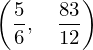

In [4]:
z_s = -f.expr.coeff(z,1)/(2*f.expr.coeff(z,2))
y_s = f(z_s)

(z_s,y_s)

Die Schnittpunkte mit der $x$-Achse ermittelt man durch Lösen der quadratischen Gleichung

\begin{align}
  f(z)&= 0\\
  3\,z^2 -5\,z + 9 &= 0
\end{align}

In [5]:
eq = Eq(f(z),0)
eq

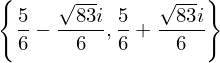

In [6]:
lsg = solveset(eq)
lsg

In diesem Fall existieren keine Schnittpunkte mit der $z$-Achse. Das erkennt man daran, dass die Lösung *komplexe* Zahlen enthält, die durch den Faktor $i$ gekennzeichnet sind. Sollen solche *komplexen* Lösungen nicht angezeigt werden. so schreibt man

In [7]:
lsg = solveset(eq,domain=S.Reals)
lsg

Die Lösung wird als Menge von Elementen zurückgegeben. Wenn es keine Lösungen gibt, so enthält diese Menge keine Elemente. Man spricht von einer leeren Menge, in Zeichen: $\emptyset$. Diese Parabel schneidet die $z$-Achse nicht.

Um den Ausdruck in einem Diagramm darzustellen, wird `matplotlib` mit `numpy` benutzt:

In [8]:
d = 3
lz = np.linspace(float(z_s)-d,float(z_s)+d)

df = pd.DataFrame(
    {
        'z': lz,
        'y': f.lambdified(lz)
    }
)

df.head()

,z,y
0,-2.166667,33.916667
1,-2.044218,31.757566
2,-1.921769,29.688428
3,-1.799320,27.709253
4,-1.676871,25.820040


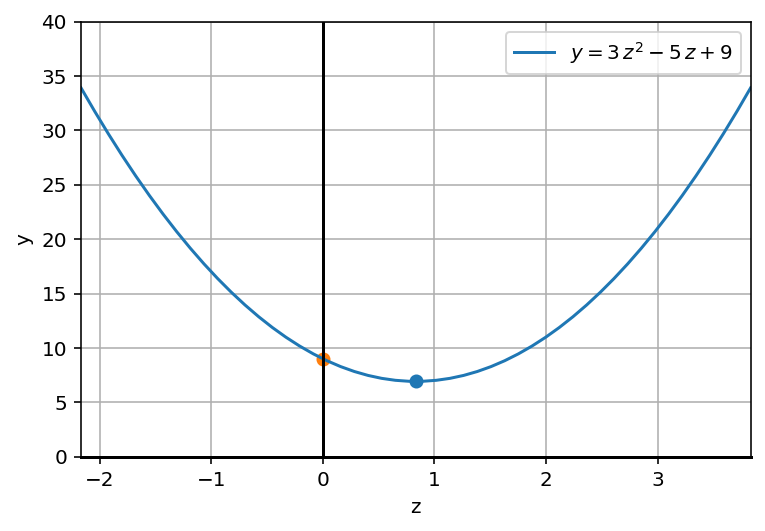

In [9]:
ax = df.plot(
    x='z', # Achtung: pandas / matplotlib nennt die unabhängige Variable x
    y='y',label=f'$y=3\,z^2 - 5\,z + 9$',
    grid=True
)

ax.scatter(z_s,f(z_s))
ax.scatter(0,f(0))

ax.set(ylim=(0,40),ylabel='y')
ax.axhline(0,c='k',clip_on=False)
ax.axvline(0,c='k')

## Aufgabe

- Stellen Sie die Funktion $f(v) = -5\,v^2 +3\,v + 26$ in einem Diagramm dar. 
  Bestimmen Sie dazu mit `sympy` den Scheitelpunkt und zeichnen Sie diesen in das Diagramm ein.

  Wählen Sie das Intervall für die $v$-Achse so, dass der Scheitelpunkt gut erkennbar ist.
  
- Bestimmen Sie die Schnittpunkte mit den Achsen des Koordninatensystems.

In [1]:
# Ihre Lösung beginnt hier